In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
import seaborn as sns

Read the data from the provided link

In [ ]:
df = pd.read_csv('/gdrive/MyDrive/student_scores - student_scores.csv')



,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


Understand the data by reading first 5 and last 5 records from the dataset

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


Check the shape of data

In [ ]:
df.shape

(25, 2)

Check if there is any null values

In [ ]:
df.isna()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


Display the summary of the dataset

In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Group the data using score and hours, then Using bar chart ,plot score vs hours. The next phase is to enter distribution scores and plot them according to the requirement, here we are going to enter the title, x_label, and y_label, and show it according to the desired result.

<Axes: title={'center': 'Hours vs Scores of Students'}, xlabel='Hours', ylabel='Scores'>

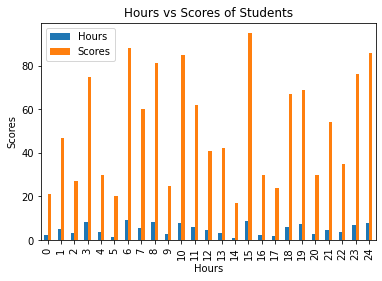

In [ ]:
df.groupby(['Scores','Hours']).mean()
df.plot.bar(xlabel = 'Hours', ylabel = 'Scores', title = 'Hours vs Scores of Students')


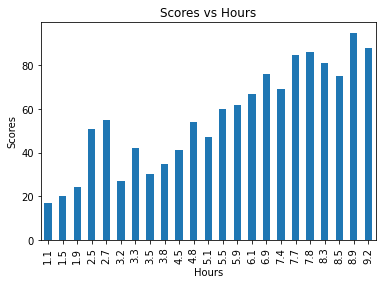

In [ ]:
grouped_data = df.groupby(["Hours"])["Scores"].sum()
grouped_data.plot(kind="bar", xlabel="Hours", ylabel="Scores", title="Scores vs Hours")
plt.show()

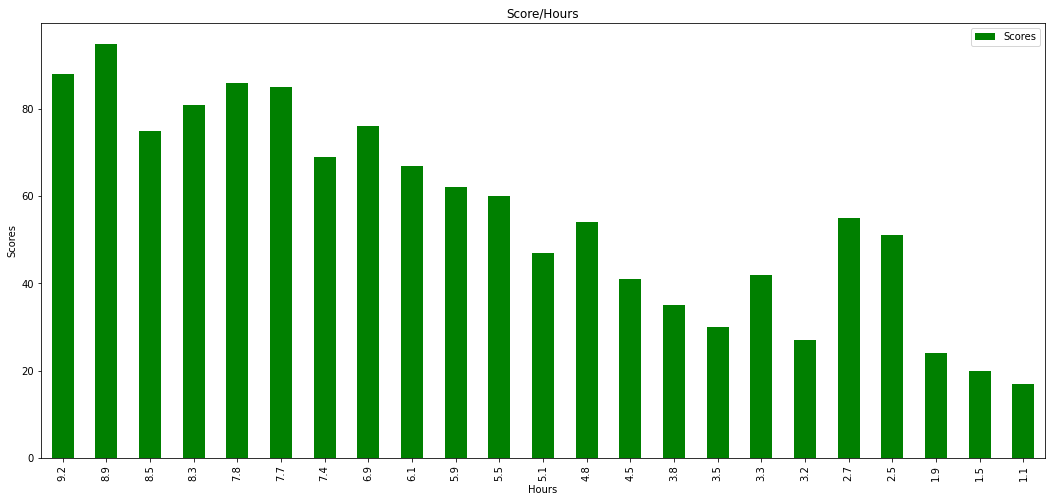

In [ ]:
csp = df.groupby("Hours")[["Scores"]].sum().sort_values(by = "Hours", ascending = False)
csp[:].plot.bar(color = ["green"],figsize= (18,8))
plt.title("Score/Hours")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

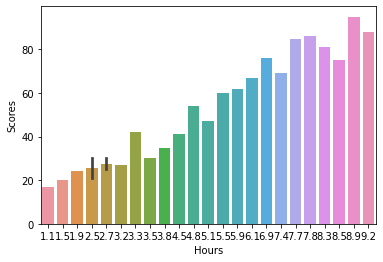

In [ ]:
sns.barplot(x ='Hours',y ='Scores',data = df)
plt.show()

Visualize distribution of data using scatter plot

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Hours', ylabel='Scores'>

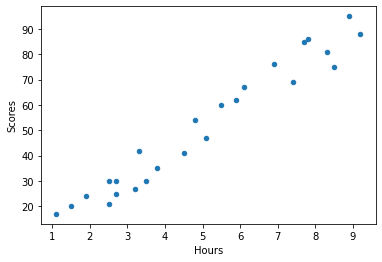

In [ ]:
df.plot.scatter(x='Hours',y='Scores')

Prepare the data by splitting it into Training and Test set

In [ ]:
x_data = df[['Hours']]
y_data = df[['Scores']]
x_train,x_test,y_train,y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state =0)

Plot the regression line

<Axes: xlabel='Hours', ylabel='Scores'>

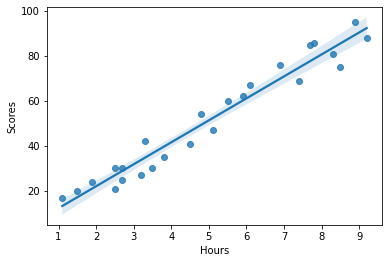

In [ ]:
sns.regplot(x='Hours',y='Scores',data=df)

Plot the training and test data . Predict the score and compare predicted and actual score

<Axes: xlabel='Hours', ylabel='Scores'>

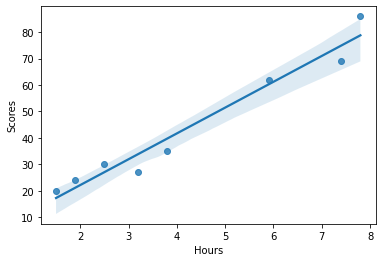

In [ ]:
sns.regplot(x=x_test,y=y_test,data=df)

<Axes: xlabel='Hours', ylabel='Scores'>

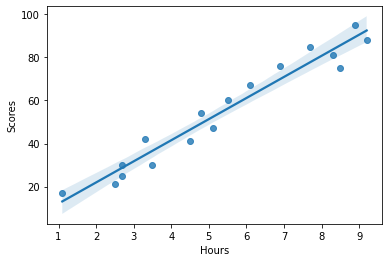

In [ ]:
sns.regplot(x=x_train,y=y_train,data=df)

Predict accuracy using r2square

In [ ]:
lm = LinearRegression()
lm.fit(x_data,y_data)
lm.score(x_data,y_data)

0.9529481969048356

Predict the percentage grade of a student if study hours are 9.25

In [ ]:
"""Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(9.25,y_data)
pipe.score(9.25,y_data)"""


"Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]\npipe=Pipeline(Input)\npipe.fit(9.25,y_data)\npipe.score(9.25,y_data)"

In [ ]:
hours = 9.25
predicted_score = lm.predict([[hours]])[0]
predicted_score

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92.90985477])

Evaluate the model: Calculate Mean absolute error, mean squared error, root mean squared error

In [ ]:
from sklearn import metrics
y_pred = lm.predict(x_test)
metrics.mean_absolute_error(y_test,y_pred)


4.399809444644845

In [ ]:
metrics.mean_squared_error(y_test,y_pred)

22.9482322744788

In [ ]:
metrics.mean_squared_error(y_test,y_pred, squared=False)

4.790431324471608

Import seaborn and plot the distribution as well

<Axes: xlabel='Hours'>

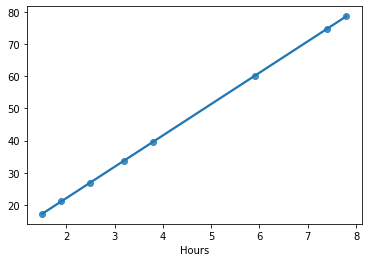

In [ ]:
sns.regplot(x=x_test,y=y_pred,data=df)

Print actual vs predicted percentage score

In [ ]:
y_test


,Scores
5,20
2,27
19,69
16,30
11,62
22,35
17,24
24,86


In [ ]:
y_pred

array([[17.14737849],
       [33.76624426],
       [74.8246185 ],
       [26.92318188],
       [60.16091341],
       [39.63172629],
       [21.05769985],
       [78.73493985]])

In [ ]:
from sklearn.model_selection import cross_val_score
Scores = cross_val_score(lm, y_test, y_pred, cv=3).mean()
print(Scores)

0.9234970164903556


Apply ridge and grid search to improvise your model

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
ridge=Ridge(alpha=0.1)
ridge.fit(x_train,y_train)
ridge.score(x_train,y_train)

0.9484988584630717

In [ ]:
grid=GridSearchCV(Ridge(),[{'alpha':[0.001,0.1,1,10]}], cv=4)
grid.fit(x_data,y_data)
grid.best_estimator_

score1=grid.cv_results_
score1['mean_test_score']

array([0.92778562, 0.92779737, 0.9278217 , 0.92122521])